In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

titanic = pd.read_csv('C:\DS&AI\Vimala\Python\ML-1\Titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>There are missing values in Age, Embarked and Cabin. 

Age is a continuous variable, so missing values should be replaced with mean/median

Embraked is a categorical Variable, so it should be replaced with mode

Cabin is not a categorical/numeric variable. 

Non-Numerical Columns:Name, ticket & cabin should be dropped

Categorical Columns : Age,Gender, Embarked should be converted to numeric

In [45]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2><b> EDA

In [46]:
print('Nan values before changes',titanic['Age'].isna().sum()) # filling missing values in age
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
print('Nan values after changes',titanic['Age'].isna().sum())
#titanic['Age']=titanic['Age'].apply(pd.to_numeric)

Nan values before changes 177
Nan values after changes 0


In [47]:
print('Nan values before changes',titanic['Embarked'].isna().sum()) # filling missing values in Embark column
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].unique())
titanic['Embarked'].fillna(sts.mode(titanic['Embarked']),inplace=True)
print('Nan values after changes',titanic['Embarked'].isna().sum())


Nan values before changes 2
S    644
C    168
Q     77
Name: Embarked, dtype: int64
['S' 'C' 'Q' nan]
Nan values after changes 0


In [48]:
lb_make=LabelEncoder() # converting categorical column to numerical
titanic['Gender']=lb_make.fit_transform(titanic['Sex'])
titanic['Embarked']=lb_make.fit_transform(titanic['Embarked'])


In [49]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # creating new columns
titanic['Title'] = titanic['Title'].replace(['Countess','Mlle','Sir','Lady','Ms','Mme'], 1)
titanic['Title'] = titanic['Title'].replace(['Mrs','Miss','Master'], 2)
titanic['Title'] = titanic['Title'].replace(['Mr','Dr','Major','Col','Capt','Jonkheer','Don','Rev'], 0)

In [50]:
titanic.drop(['Name','Sex','Ticket','Cabin'],axis=1,inplace=True) # dropping text type columns
target=titanic['Survived']
titanic.drop(['Survived'],inplace=True,axis=1)
titanic.insert(9,'Target',target)
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Title,Target
0,1,3,22.0,1,0,7.2500,2,1,0,0
1,2,1,38.0,1,0,71.2833,0,0,2,1
2,3,3,26.0,0,0,7.9250,2,0,2,1
3,4,1,35.0,1,0,53.1000,2,0,2,1
4,5,3,35.0,0,0,8.0500,2,1,0,0


In [51]:
titanic['Target'].value_counts()

0    549
1    342
Name: Target, dtype: int64

In [52]:
titanic['accompanied']=titanic['SibSp']+titanic['Parch'] # adding 2 columns to one as both are related to accompanied (sibings and parents/partners)
titanic['accompanied'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: accompanied, dtype: int64

In [53]:
titanic.loc[titanic['accompanied'] > 0] = 1
titanic['accompanied'].value_counts()

0    537
1    354
Name: accompanied, dtype: int64

In [54]:
#temp=titanic3.drop(['accompanied'])

target=titanic['accompanied']
titanic.drop(['accompanied'],inplace=True,axis=1)
titanic.insert(0,'accompanied',target)


In [55]:
titanic=titanic.drop(['SibSp','Parch'],axis=1) # removing unneccesary columns
titanic=titanic.drop(['PassengerId'],axis=1)
titanic=titanic.drop(['Fare'],axis=1)

In [56]:
titanic.head() #final df

,accompanied,Pclass,Age,Embarked,Gender,Title,Target
0,1,1,1.0,1,1,1,1
1,1,1,1.0,1,1,1,1
2,0,3,26.0,2,0,2,1
3,1,1,1.0,1,1,1,1
4,0,3,35.0,2,1,0,0


In [57]:
from sklearn import tree
x_train,x_test,y_train,y_test=train_test_split(titanic.iloc[:,:-1].values,titanic['Target'].values,test_size=0.2,random_state=6)



In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
#regressor = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<h2><b>Accuracy of model with Random Forest classifier is 91%

acc:91.06
cm:
[[73 11]
 [ 5 90]]
report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        78
           1       0.95      0.89      0.92       101

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179



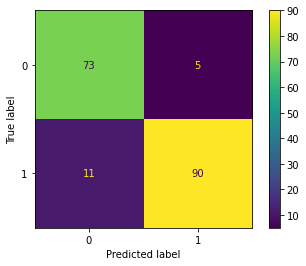

In [93]:
#y_pred = model.predict(x_test)
acc = accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
report=classification_report(y_test, y_pred, digits=2)
print('acc:{}\ncm:\n{}\nreport:\n{}'.format(round(acc*100,2),cm,report))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test) 

In [97]:
wrong2=[] # wrong predictions in the model
for i in range(len(y_test)):
    if y_test[i]!=y_pred[i]:
        print(y_test[i],y_pred[i],i)
        wrong2.append(i)

1 0 12
1 0 15
1 0 19
0 1 23
0 1 32
1 0 36
0 1 41
1 0 46
1 0 50
1 0 51
1 0 86
1 0 89
0 1 99
1 0 126
1 0 147
0 1 148
